# Mapping Interconnections: Conspiracies Behind Wildfire Causes in Portugal (part 3 - Visual analysis)

Carregar o CSV

In [1]:
import pandas as pd

# Carregar o CSV com conteúdos
df_artigos = pd.read_csv('detalhes_artigos_completo.csv')

df_artigos

,termo,site,ano,titulo,data,link,contents
0,incêndio,www.publico.pt,2017,Incêndio em Gaia - PÚBLICO,2017-01-18 04:36:37,https://arquivo.pt/noFrame/replay/201701180436...,('cookies cookies porpaulo pimenta 25 10 2016 ...
1,incêndio,www.publico.pt,2017,Complexo turístico Zmar recupera as infra-estr...,2017-01-10 20:21:26,https://arquivo.pt/noFrame/replay/201701102021...,('obras recuperacao edificios infra estruturas...
2,incêndio,www.publico.pt,2017,Zambujeira do Mar - PÚBLICO,2017-01-11 02:26:52,https://arquivo.pt/noFrame/replay/201701110226...,('cookies cookies todos porcarlos dias 10 01 2...
3,incêndio,www.publico.pt,2017,Ferreira do Zêzere - PÚBLICO,2017-01-11 06:05:20,https://arquivo.pt/noFrame/replay/201701110605...,('cookies esti utilizazo cookies localizazo to...
4,incêndio,www.publico.pt,2017,Andrzej Zulawski (1940 - 2016) - PÚBLICO,2017-06-22 05:00:38,https://arquivo.pt/noFrame/replay/201706220500...,('cookies cookies todos porluis miguel queiros...
...,...,...,...,...,...,...,...
522,seca,www.cmjornal.pt,2018,Vocalista dos Xutos surpreendido com homenagem...,2018-02-06 08:11:35,https://arquivo.pt/noFrame/replay/201802060811...,('tim vocalista banda portuguesa xutos pontape...
523,seca,www.cmjornal.pt,2018,Coro canta ‘Xutos & Pontapés’ e recorda Zé Ped...,2018-02-02 22:52:34,https://arquivo.pt/noFrame/replay/201802022252...,('nao unico olhar ceu cantam xutos pontapes do...
524,seca,www.cmjornal.pt,2018,Apple acaba com iPhone X já este verão - Tecno...,2018-02-07 03:30:17,https://arquivo.pt/noFrame/replay/201802070330...,('pensar comprar iphone x entao pense melhor a...
525,seca,www.cmjornal.pt,2018,Shawn Mendes atua no festival Sudoeste na Zamb...,2018-02-06 23:30:27,https://arquivo.pt/noFrame/replay/201802062330...,('pub pub pub pub copyright 2018 todos direito...


### 1. Sentiment analysis

In [2]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Baixando os recursos necessários do NLTK
nltk.download('vader_lexicon')

# Criando o analisador de sentimentos
analyzer = SentimentIntensityAnalyzer()

# Exemplo de texto para análise
text = "A mina causou um incêndio devastador."

# Analisando o sentimento
sentiment = analyzer.polarity_scores(text)

# Exibindo o resultado
print(sentiment)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ap3lo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


2min32s

In [3]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer  # Adicionando VADER
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.util import ngrams
from matplotlib_venn import venn2, venn3

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')  # Baixe o léxico do VADER

# Carregar o CSV original
df_artigos = pd.read_csv('detalhes_artigos_liquidos.csv')

# Adicionar colunas para o conteúdo e sentimentos
df_artigos['contents'] = None
df_artigos['sentiment_compound'] = None  # Score composto do VADER
df_artigos['sentiment_pos'] = None       # Proporção positiva
df_artigos['sentiment_neu'] = None       # Proporção neutra
df_artigos['sentiment_neg'] = None       # Proporção negativa

# Função para limpar o texto
def clean_text(text):
    unwanted_phrases = [
        r"pague assinatura", r"aceite as cookies", r"ad block", r"publicidade", r"cookies", r"aceitar cookies", r"todos"
    ]
    for phrase in unwanted_phrases:
        text = re.sub(phrase, '', text, flags=re.IGNORECASE)
    
    stop_words = set(stopwords.words('portuguese'))
    word_tokens = word_tokenize(text.lower())
    filtered_text = [word for word in word_tokens if word not in stop_words and word.isalpha()]
    cleaned_text = TreebankWordDetokenizer().detokenize(filtered_text)
    return cleaned_text.strip()

# Função para fazer scraping e limpar o artigo
def scrape_and_clean_article(url):
    try:
        response = requests.get(url)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, 'html.parser')

        # Extrair o conteúdo do artigo
        content_div = soup.find('div', {'class': 'story__body'})
        if content_div:
            content = "\n".join([p.get_text(strip=True) for p in content_div.find_all('p')])
        else:
            content = "\n".join([p.get_text(strip=True) for p in soup.find_all('p')])

        # Limpar o conteúdo
        cleaned_content = clean_text(content)
        return cleaned_content
    except Exception as e:
        print(f"Erro ao processar {url}: {e}")
        return None

# Inicializando o analisador de sentimentos do VADER
analyzer = SentimentIntensityAnalyzer()

# Iterar sobre os links e fazer o scraping, limpeza e análise de sentimentos
for index, row in df_artigos.iterrows():
    url = row['link']
    cleaned_content = scrape_and_clean_article(url)
    if cleaned_content:
        df_artigos.at[index, 'contents'] = cleaned_content

        # Análise de sentimentos
        sentiment = analyzer.polarity_scores(cleaned_content)
        df_artigos.at[index, 'sentiment_compound'] = sentiment['compound']
        df_artigos.at[index, 'sentiment_pos'] = sentiment['pos']
        df_artigos.at[index, 'sentiment_neu'] = sentiment['neu']
        df_artigos.at[index, 'sentiment_neg'] = sentiment['neg']

# Salvar os resultados em um CSV
df_artigos.to_csv('detalhes_artigos_completo_com_sentimentos.csv', index=False)

print("Web scraping, limpeza e análise de sentimentos concluídos!")
print("Dados guardados em 'detalhes_artigos_completo_com_sentimentos.csv'.")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ap3lo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ap3lo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ap3lo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Erro ao processar https://arquivo.pt/noFrame/replay/20170815152855/http://www.sapo.pt/noticias/controlado-incendio-em-torre-residencial-no_598431e25e28b30728870262: 404 Client Error: Not Found for url: https://arquivo.pt/noFrame/replay/20170815152855/http://24.sapo.pt/noticias/internacional/artigo/controlado-incendio-em-torre-residencial-no-dubai_22757989.html
Web scraping, limpeza e análise de sentimentos concluídos!
Dados guardados em 'detalhes_artigos_completo_com_sentimentos.csv'.


2min25s

In [4]:
# Definir palavras-chave relacionadas ao contexto
keywords_positive = ['controlado', 'rápido', 'contido', 'salvo', 'resolvido']
keywords_negative = ['descontrolado', 'desastre', 'devastador', 'caos', 'grave']

# Iterar sobre os artigos
for index, row in df_artigos.iterrows():
    url = row['link']
    cleaned_content = scrape_and_clean_article(url)
    if cleaned_content:
        df_artigos.at[index, 'contents'] = cleaned_content

        # Análise de sentimentos com VADER
        sentiment = analyzer.polarity_scores(cleaned_content)
        df_artigos.at[index, 'sentiment_compound'] = sentiment['compound']
        df_artigos.at[index, 'sentiment_pos'] = sentiment['pos']
        df_artigos.at[index, 'sentiment_neu'] = sentiment['neu']
        df_artigos.at[index, 'sentiment_neg'] = sentiment['neg']

        # Contextualizar o sentimento
        if any(word in cleaned_content.lower() for word in keywords_positive):
            df_artigos.at[index, 'sentiment_context'] = 'Positivo'
        elif any(word in cleaned_content.lower() for word in keywords_negative):
            df_artigos.at[index, 'sentiment_context'] = 'Negativo'
        else:
            # Baseado no score composto do VADER como fallback
            if sentiment['compound'] >= 0.05:
                df_artigos.at[index, 'sentiment_context'] = 'Positivo'
            elif sentiment['compound'] <= -0.05:
                df_artigos.at[index, 'sentiment_context'] = 'Negativo'
            else:
                df_artigos.at[index, 'sentiment_context'] = 'Neutro'

Erro ao processar https://arquivo.pt/noFrame/replay/20170815152855/http://www.sapo.pt/noticias/controlado-incendio-em-torre-residencial-no_598431e25e28b30728870262: 404 Client Error: Not Found for url: https://arquivo.pt/noFrame/replay/20170815152855/http://24.sapo.pt/noticias/internacional/artigo/controlado-incendio-em-torre-residencial-no-dubai_22757989.html


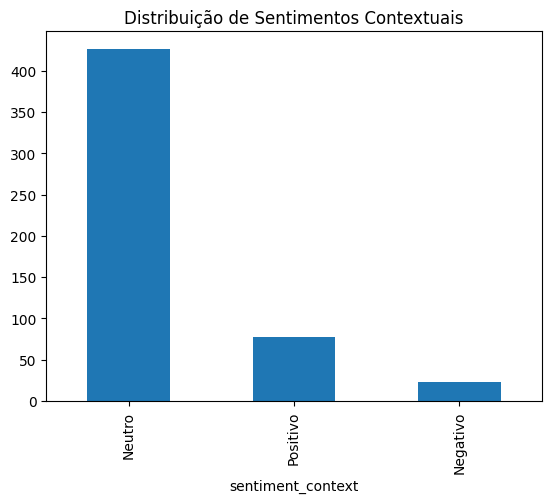

In [5]:
df_artigos['sentiment_context'].value_counts().plot(kind='bar')
plt.title('Distribuição de Sentimentos Contextuais')
plt.show()

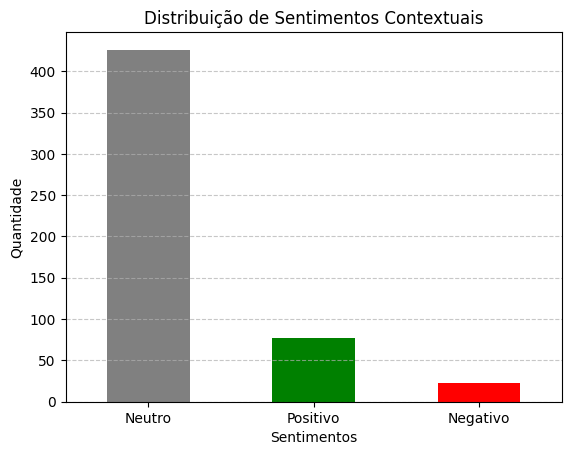

In [8]:
# Contar os valores de cada sentimento
sentiment_counts = df_artigos['sentiment_context'].value_counts()

# Definir cores para cada categoria
colors = {'Positivo': 'green', 'Negativo': 'red', 'Neutro': 'gray'}

# Criar o gráfico de barras com cores personalizadas
sentiment_counts.plot(kind='bar', color=[colors[label] for label in sentiment_counts.index])

# Personalizar o gráfico
plt.title('Distribuição de Sentimentos Contextuais')
plt.xlabel('Sentimentos')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)  # Mantém os rótulos horizontais
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adiciona uma grade ao eixo Y
plt.show()

### 2. Rede de interconexcões

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

# Lista de palavras-chave
keywords_list = [
    "incêndio", "queimada", "fogo florestal", "mina", "indústria papel",
    "exploração de lítio", "fogo posto", "eucalipto", "pinhal", "pinhais",
    "limpeza florestal", "calor extremo", "vento forte", "seca"
]

# Criar grafo
G = nx.Graph()

# Adicionar arestas com base nas palavras-chave
for index, row in df_artigos.iterrows():
    # Verificar se a coluna 'contents' não é None antes de processar
    if row['contents'] is not None:
        # Obter palavras presentes no artigo que estão na lista de palavras-chave
        keywords_in_article = set(row['contents'].split()) & set(keywords_list)
        # Adicionar arestas para cada par de palavras-chave no mesmo artigo
        for kw1 in keywords_in_article:
            for kw2 in keywords_in_article:
                if kw1 != kw2:
                    G.add_edge(kw1, kw2)

# Visualizar o grafo
plt.figure(figsize=(12, 12))
nx.draw_networkx(
    G,
    with_labels=True,
    node_color='skyblue',
    edge_color='grey',
    node_size=1500,
    font_size=10,
)
plt.title('Rede de Interconexões de Palavras-Chave')
plt.show()


ModuleNotFoundError: No module named 'networkx'

3. Heatmap

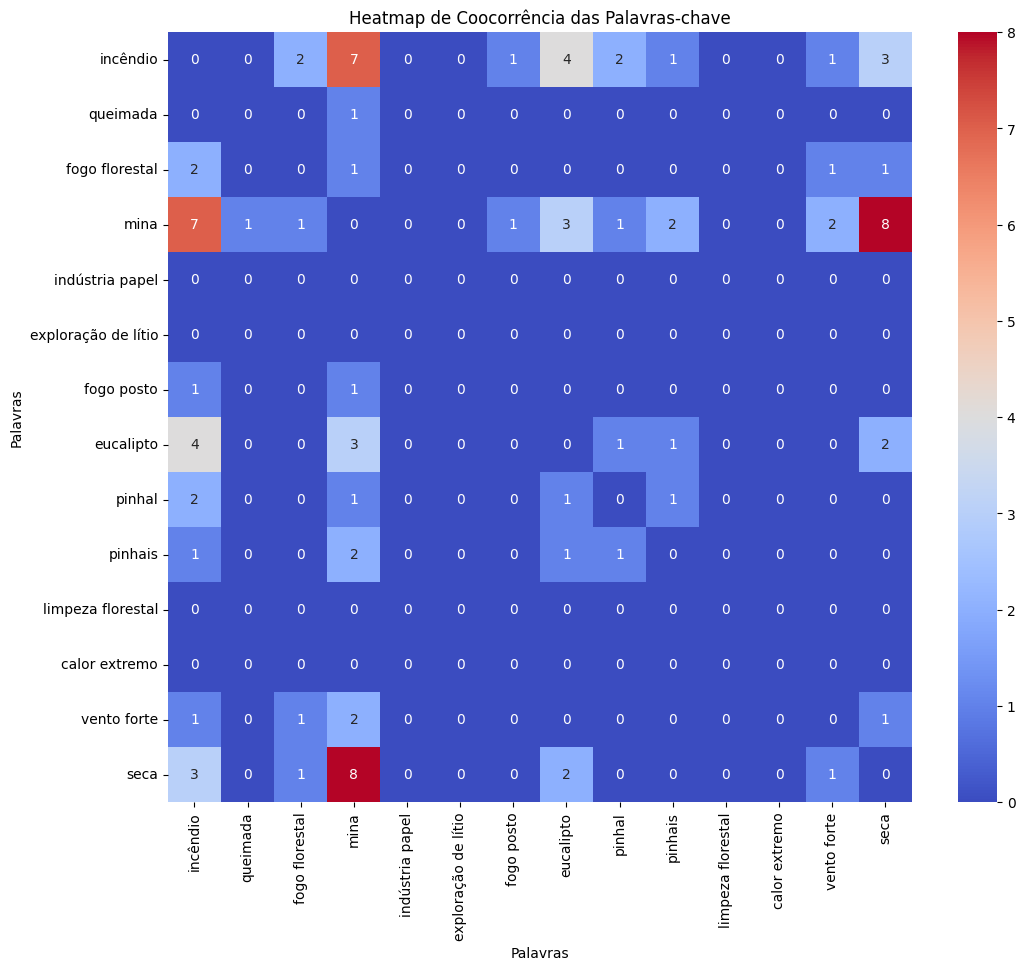

In [10]:
# Updated list of keywords
palavras_chave = [
    "incêndio", "queimada", "fogo florestal", "mina", "indústria papel", "exploração de lítio", 
    "fogo posto", "eucalipto", "pinhal", "pinhais", "limpeza florestal", "calor extremo", "vento forte", "seca"
]

# Function to find keywords in the content
def encontrar_palavras_chave(conteudo, palavras):
    if conteudo:
        tokens = conteudo.lower()
        return {palavra for palavra in palavras if palavra in tokens}
    return set()

# Apply keyword search to the DataFrame
df_artigos['keywords'] = df_artigos['contents'].apply(lambda x: encontrar_palavras_chave(x, palavras_chave))

# Create sets for each keyword
sets = {palavra: set() for palavra in palavras_chave}
for index, row in df_artigos.iterrows():
    for palavra in row['keywords']:
        sets[palavra].add(index)

# Create the co-occurrence matrix
coocorrencia = pd.DataFrame(0, index=palavras_chave, columns=palavras_chave)
for palavra1 in palavras_chave:
    for palavra2 in palavras_chave:
        if palavra1 != palavra2:
            coocorrencia.at[palavra1, palavra2] = len(sets[palavra1].intersection(sets[palavra2]))

# Block for plotting the heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(coocorrencia, annot=True, cmap="coolwarm", fmt="d", cbar=True)
plt.title("Heatmap de Coocorrência das Palavras-chave")
plt.xlabel("Palavras")
plt.ylabel("Palavras")
plt.show()


4. Venn diagrams

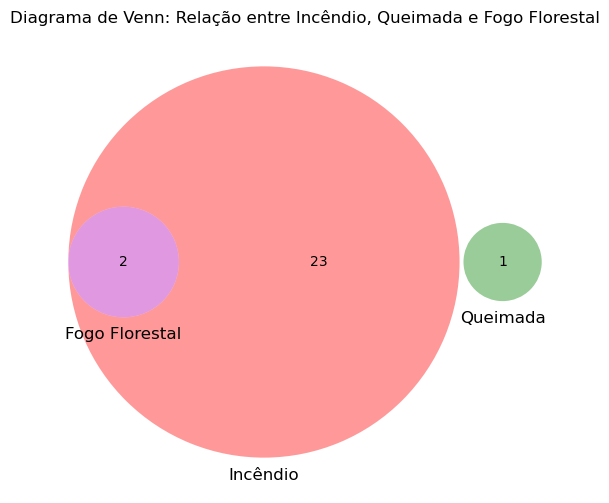

In [10]:
# Block for Venn diagram with three keywords (example: "incêndio", "queimada", "fogo florestal")
from matplotlib_venn import venn3

plt.figure(figsize=(8, 6))
venn3([sets["incêndio"], sets["queimada"], sets["fogo florestal"]],
      set_labels=("Incêndio", "Queimada", "Fogo Florestal"))
plt.title("Diagrama de Venn: Relação entre Incêndio, Queimada e Fogo Florestal")
plt.show()


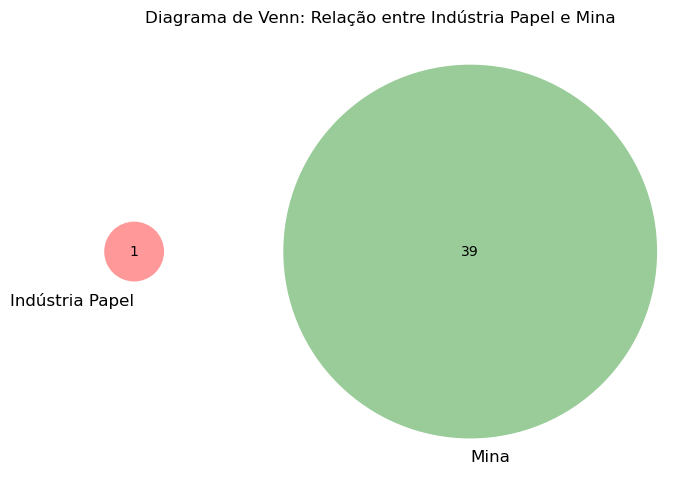

In [11]:
# Block for Venn diagram with two keywords (example: "indústria papel" and "mina")
from matplotlib_venn import venn2

plt.figure(figsize=(8, 6))
venn2([sets["indústria papel"], sets["mina"]], set_labels=("Indústria Papel", "Mina"))
plt.title("Diagrama de Venn: Relação entre Indústria Papel e Mina")
plt.show()


# Proposta de trabalho

In [21]:
print(df_artigos.columns)


Index(['termo', 'site', 'ano', 'titulo', 'data', 'link', 'contents',
       'sentiment_compound', 'sentiment_pos', 'sentiment_neu', 'sentiment_neg',
       'sentiment_class'],
      dtype='object')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ap3lo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Artigos que mencionam simultaneamente 'Incêndio' e 'Mina':
                                              contents  sentiment_compound  \
108  incêndio florestal deflagrou hora almoço deste...              0.0000   
116  desde início ano arderam mil hectares registad...              0.0000   
305  presidente câmara mortágua acredita fogo defla...              0.0000   
327  objetivo travar expansão obrigando novas plant...              0.9118   
383  absurdo pretender resolve problema ausência ge...              0.3612   
391  municípios exigem ativação fundo municipal eme...              0.1779   
392  atingidas cerca casas primeira habitação gover...              0.0000   

    sentiment_class  
108        Positivo  
116        Negativo  
305          Neutro  
327        Positivo  
383        Positivo  
391        Positivo  
392        Negativo  


C:\Users\ap3lo\AppData\Local\Temp\ipykernel_22620\698327528.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relacionados[['incêndio_sentiment', 'mina_sentiment']] = df_relacionados.apply(sentiment_based_on_terms, axis=1, result_type='expand')
C:\Users\ap3lo\AppData\Local\Temp\ipykernel_22620\698327528.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relacionados[['incêndio_sentiment', 'mina_sentiment']] = df_relacionados.apply(sentiment_based_on_terms, axis=1, result_type='expand')


<Figure size 800x600 with 0 Axes>

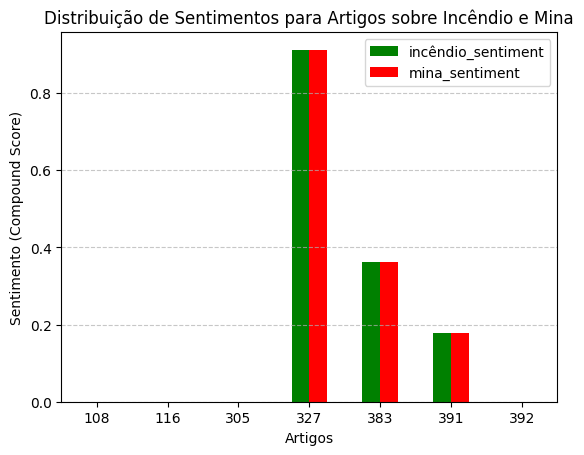

Relações entre Incêndio e Mina nos Artigos:
relacao_incendio_mina
Neutro ou Sem Relação    7
Name: count, dtype: int64


C:\Users\ap3lo\AppData\Local\Temp\ipykernel_22620\698327528.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relacionados['relacao_incendio_mina'] = df_relacionados.apply(


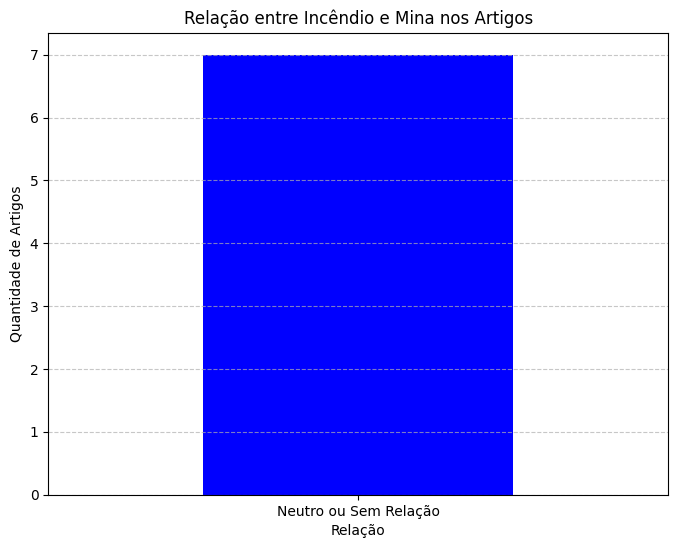

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Baixar os recursos necessários para análise de sentimentos
nltk.download('vader_lexicon')

# Carregar o CSV com os conteúdos
df_artigos = pd.read_csv('detalhes_artigos_completo_com_sentimentos.csv')

# Limpar espaços extras nos nomes das colunas
df_artigos.columns = df_artigos.columns.str.strip()

# Definir as palavras-chave que você deseja buscar
palavras_chave = ["incêndio", "mina"]

# Definir palavras associadas a sentimentos positivos, negativos e neutros
palavras_positivas = ["bom", "sucesso", "favorável", "positivo", "excelente", "melhor", "prosperidade", "fake news", "assistência rápida"]
palavras_negativas = ["ruim", "perigoso", "falha", "negativo", "desastre", "dano", "grave", "risco"]
palavras_neutras = ["normal", "comum", "neutro", "sem impacto", "indiferente"]

# Inicializar o analisador de sentimentos
analyzer = SentimentIntensityAnalyzer()

# Função para classificar o sentimento de um texto
def classificar_sentimento(score, texto):
    if score is None:
        return "Indeterminado"
    
    # Verificar se o texto é uma string antes de aplicar .lower()
    if isinstance(texto, str):
        texto_lower = texto.lower()
    
        # Ajustar a classificação baseada nas palavras no texto
        if any(palavra in texto_lower for palavra in palavras_positivas):
            return "Positivo"
        elif any(palavra in texto_lower for palavra in palavras_negativas):
            return "Negativo"
        elif any(palavra in texto_lower for palavra in palavras_neutras):
            return "Neutro"
    
    # Caso não encontre palavras-chave de sentimento.
    if score > 0.05:
        return "Positivo"
    elif score < -0.05:
        return "Negativo"
    else:
        return "Neutro"

# Analisar o sentimento de todos os artigos
df_artigos['sentiment_compound'] = df_artigos['contents'].apply(
    lambda x: analyzer.polarity_scores(x)['compound'] if pd.notnull(x) else None
)

# Adicionar uma classificação de sentimento ao DataFrame principal com base nas palavras-chave de sentimento
df_artigos['sentiment_class'] = df_artigos.apply(
    lambda row: classificar_sentimento(row['sentiment_compound'], row['contents']),
    axis=1
)

# Filtrar artigos que mencionam simultaneamente "incêndio" e "mina"
df_relacionados = df_artigos[df_artigos['contents'].apply(
    lambda x: "incêndio" in x and "mina" in x if isinstance(x, str) else False
)]

# Exibir os artigos que mencionam simultaneamente "incêndio" e "mina"
print("Artigos que mencionam simultaneamente 'Incêndio' e 'Mina':")
print(df_relacionados[['contents', 'sentiment_compound', 'sentiment_class']])

# Agora, separar os artigos que tratam de "incêndio" e "mina" separadamente no sentimento
# Vamos criar uma coluna para identificar a polaridade do sentimento com base nos termos
def sentiment_based_on_terms(row):
    if "incêndio" in row['contents'] and "mina" in row['contents']:
        # Separar os termos: incendios e mina
        incendios_sentiment = analyzer.polarity_scores(row['contents'])
        mina_sentiment = analyzer.polarity_scores(row['contents'])
        
        # Exemplo de como identificar relação: pode-se verificar a presença de polaridade
        # para os termos relacionados no conteúdo.
        return {
            "incêndio_sentiment": incendios_sentiment['compound'],
            "mina_sentiment": mina_sentiment['compound']
        }
    return {}

df_relacionados[['incêndio_sentiment', 'mina_sentiment']] = df_relacionados.apply(sentiment_based_on_terms, axis=1, result_type='expand')

# Gráfico da distribuição de sentimentos para artigos relacionados a "Incêndio" e "Mina"
plt.figure(figsize=(8, 6))
df_relacionados[['incêndio_sentiment', 'mina_sentiment']].plot(kind='bar', color=['green', 'red'])
plt.title("Distribuição de Sentimentos para Artigos sobre Incêndio e Mina")
plt.xlabel("Artigos")
plt.ylabel("Sentimento (Compound Score)")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Identificar e contar os artigos onde a relação entre "incêndio" e "mina" é positiva ou negativa
df_relacionados['relacao_incendio_mina'] = df_relacionados.apply(
    lambda row: "Incêndio Positivo, Mina Negativo" if row['incêndio_sentiment'] > 0 and row['mina_sentiment'] < 0 
               else ("Incêndio Negativo, Mina Positivo" if row['incêndio_sentiment'] < 0 and row['mina_sentiment'] > 0 
                     else "Neutro ou Sem Relação"), axis=1
)

# Contagem das relações
relacao_count = df_relacionados['relacao_incendio_mina'].value_counts()

# Exibir as relações
print("Relações entre Incêndio e Mina nos Artigos:")
print(relacao_count)

# Gráfico das relações entre Incêndio e Mina
plt.figure(figsize=(8, 6))
relacao_count.plot(kind='bar', color=['blue', 'orange', 'gray'])
plt.title("Relação entre Incêndio e Mina nos Artigos")
plt.xlabel("Relação")
plt.ylabel("Quantidade de Artigos")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



C:\Users\ap3lo\AppData\Local\Temp\ipykernel_22620\1279261292.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relacionados['incêndio_sentiment'] = pd.to_numeric(df_relacionados['incêndio_sentiment'], errors='coerce')
C:\Users\ap3lo\AppData\Local\Temp\ipykernel_22620\1279261292.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relacionados['mina_sentiment'] = pd.to_numeric(df_relacionados['mina_sentiment'], errors='coerce')


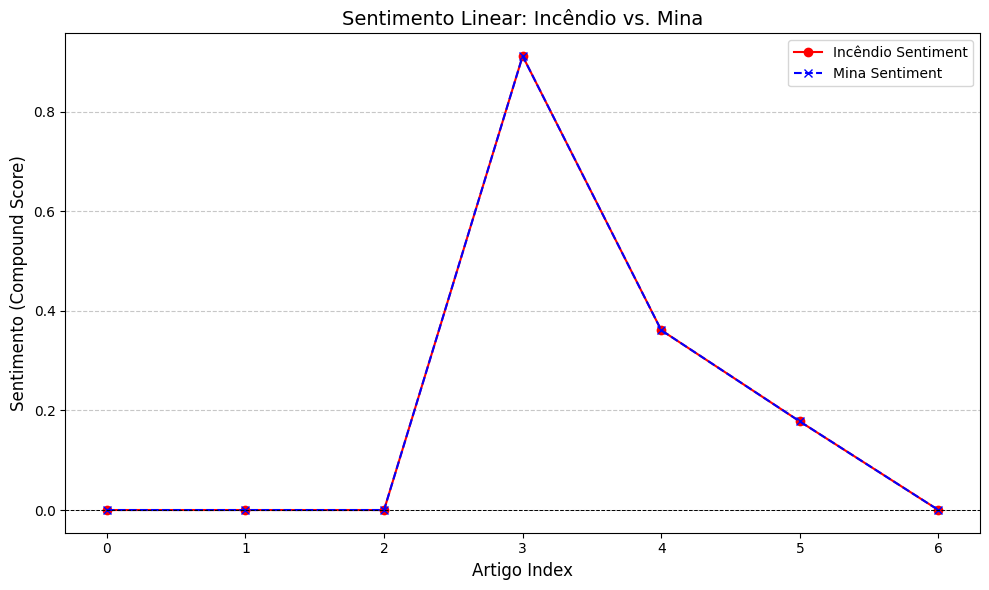

In [54]:
import matplotlib.pyplot as plt

# Garantir que as colunas 'incêndio_sentiment' e 'mina_sentiment' sejam numéricas e sem valores ausentes
df_relacionados['incêndio_sentiment'] = pd.to_numeric(df_relacionados['incêndio_sentiment'], errors='coerce')
df_relacionados['mina_sentiment'] = pd.to_numeric(df_relacionados['mina_sentiment'], errors='coerce')

# Resetar o índice para usar uma sequência ordenada
df_relacionados = df_relacionados.reset_index()

# Criar o gráfico linear para os sentimentos de "incêndio" e "mina"
plt.figure(figsize=(10, 6))
plt.plot(df_relacionados.index, df_relacionados['incêndio_sentiment'], label='Incêndio Sentiment', color='red', marker='o', linestyle='-')
plt.plot(df_relacionados.index, df_relacionados['mina_sentiment'], label='Mina Sentiment', color='blue', marker='x', linestyle='--')

# Configurações do gráfico
plt.title("Sentimento Linear: Incêndio vs. Mina", fontsize=14)
plt.xlabel("Artigo Index", fontsize=12)
plt.ylabel("Sentimento (Compound Score)", fontsize=12)
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.7)  # Linha de referência no eixo zero
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibir o gráfico
plt.tight_layout()
plt.show()

# Clustering, Problema com Código


In [ ]:
'''import sklearn
print(sklearn.__version__)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd

# Carregar os dados
df_artigos = pd.read_csv('detalhes_artigos_completo_com_sentimentos.csv')

# 1. Representação numérica dos textos (usando TF-IDF)
vectorizer = TfidfVectorizer(stop_words='portuguese')
X = vectorizer.fit_transform(df_artigos['contents'])

# 2. Aplicar K-means para realizar o clustering
num_clusters = 5  # Defina o número de clusters desejado
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_artigos['cluster'] = kmeans.fit_predict(X)

# Exibir os resultados
print(df_artigos[['contents', 'cluster']].head())'''



ModuleNotFoundError: No module named 'sklearn'

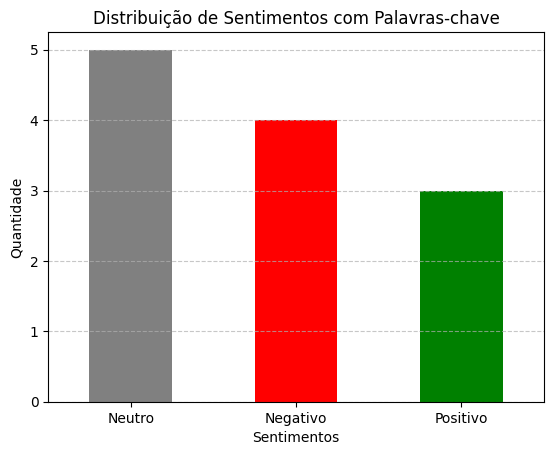

In [58]:
import matplotlib.pyplot as plt

# Contagem dos diferentes sentimentos
sentiment_counts = df_artigos['sentiment_context'].value_counts()

# Definir cores para os sentimentos
colors = {'Positivo': 'green', 'Negativo': 'red', 'Neutro': 'gray'}

# Criar o gráfico de barras
sentiment_counts.plot(kind='bar', color=[colors[label] for label in sentiment_counts.index])

# Personalizar o gráfico
plt.title('Distribuição de Sentimentos com Palavras-chave')
plt.xlabel('Sentimentos')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ap3lo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ap3lo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ap3lo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Erro ao processar https://arquivo.pt/noFrame/replay/20170622050038/http://www.publico.pt/andrzej-zulawski-1940-2016: 429 Client Error: Too Many Requests for url: https://arquivo.pt/noFrame/replay/20170622050038/http://www.publico.pt/andrzej-zulawski-1940-2016
Erro ao processar https://arquivo.pt/noFrame/replay/20170615021732/http://www.publico.pt/nova-zelandia?frm=home_tag: 429 Client Error: Too Many Requests for url: https://arquivo.pt/noFrame/replay/20170615021732/http://www.publico.pt/nova-zelandia?frm=home_tag
Erro ao processar https://arquivo.pt/noFrame/replay/20170125225107/http://www.publico.pt/multimedia/video/braco-de-ferro-entre-portugal-e-grecia-por-causa-dos-yazidi-20171251810222: 429 Client Error: Too Many Requests for url: https://arquivo.pt/noFrame/replay/20170125225107/http://www.publico.pt/multimedia/video/braco-de-ferro-entre-portugal-e-grecia-por-causa-dos-yazidi-20171251810222
Erro ao processar https://arquivo.pt/noFrame/replay/20170118032159/http://www.publico.pt/x

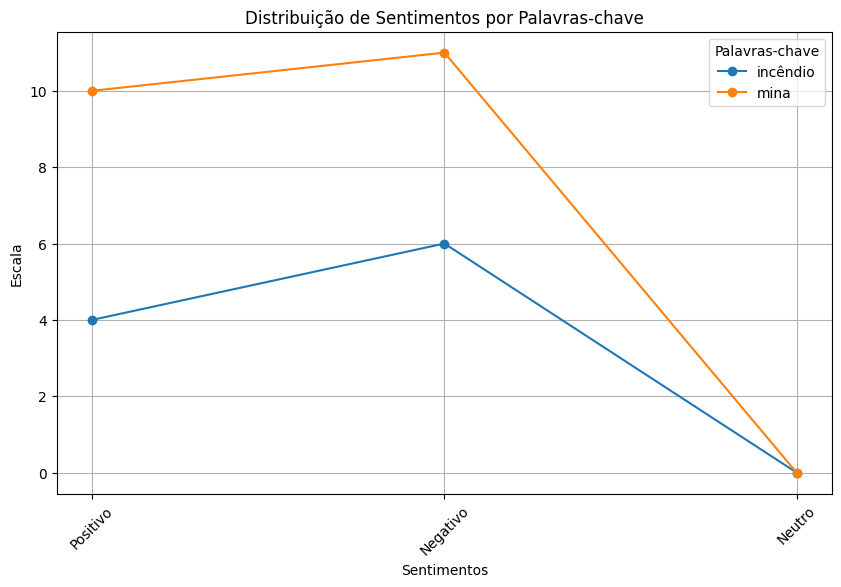

In [68]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize.treebank import TreebankWordDetokenizer
import matplotlib.pyplot as plt

# Baixar os recursos necessários do NLTK
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

# Criar o analisador de sentimentos
analyzer = SentimentIntensityAnalyzer()

# Definir palavras-chave que queremos verificar no conteúdo
keywords_incendio = ['incêndio', 'fogo', 'queimado']
keywords_mina = ['mina', 'explosão', 'subterrâneo']
keywords_positive = ['controlado', 'rápido', 'contido', 'salvo', 'resolvido']
keywords_negative = ['descontrolado', 'desastre', 'devastador', 'caos', 'grave']

# Função para análise de sentimento considerando palavras-chave
def analyze_sentiment_with_keywords(content):
    sentiment = analyzer.polarity_scores(content)
    
    # Verificar palavras-chave no conteúdo e ajustar o contexto de sentimento
    sentiment_context = 'Neutro'  # Default is neutral
    if any(word in content.lower() for word in keywords_incendio):
        sentiment_context = 'Negativo'  # "Incêndio" geralmente está relacionado a contexto negativo
    elif any(word in content.lower() for word in keywords_mina):
        sentiment_context = 'Negativo'  # "Mina" pode ter um contexto negativo dependendo do caso

    # Ajustar de acordo com o score composto
    if sentiment['compound'] >= 0.05:
        sentiment_context = 'Positivo'
    elif sentiment['compound'] <= -0.05:
        sentiment_context = 'Negativo'
    
    return sentiment, sentiment_context

# Carregar os dados
df_artigos = pd.read_csv('detalhes_artigos_completo.csv')

# Adicionar colunas para o conteúdo e sentimentos
df_artigos['contents'] = None
df_artigos['sentiment_compound'] = None  # Score composto do VADER
df_artigos['sentiment_context'] = None   # Sentimento baseado em palavras-chave
df_artigos['count_incendio'] = 0         # Contagem de 'incêndio'
df_artigos['count_mina'] = 0             # Contagem de 'mina'

# Iterar sobre os artigos para aplicar análise de sentimentos
for index, row in df_artigos.iterrows():
    url = row['link']
    # Aqui, seria necessário fazer o scraping ou já ter o conteúdo
    cleaned_content = scrape_and_clean_article(url)  # Aqui, você precisa da função de scraping que já tem
    if cleaned_content:
        df_artigos.at[index, 'contents'] = cleaned_content

        # Contar a ocorrência das palavras-chave no conteúdo
        count_incendio = sum(word in cleaned_content.lower() for word in keywords_incendio)
        count_mina = sum(word in cleaned_content.lower() for word in keywords_mina)
        
        # Armazenar as contagens
        df_artigos.at[index, 'count_incendio'] = count_incendio
        df_artigos.at[index, 'count_mina'] = count_mina

        # Realizar a análise de sentimentos com base nas palavras-chave
        sentiment, sentiment_context = analyze_sentiment_with_keywords(cleaned_content)
        
        # Armazenar resultados no dataframe
        df_artigos.at[index, 'sentiment_compound'] = sentiment['compound']
        df_artigos.at[index, 'sentiment_context'] = sentiment_context

# Contar a quantidade de cada sentimento para as palavras-chave
sentiment_by_keyword = {
    'incêndio': {'Positivo': 0, 'Negativo': 0, 'Neutro': 0},
    'mina': {'Positivo': 0, 'Negativo': 0, 'Neutro': 0}
}

# Contabilizar os sentimentos para as palavras-chave
for index, row in df_artigos.iterrows():
    if row['count_incendio'] > 0:
        sentiment_by_keyword['incêndio'][row['sentiment_context']] += 1
    if row['count_mina'] > 0:
        sentiment_by_keyword['mina'][row['sentiment_context']] += 1

# Gerar gráfico linear
sentiment_by_keyword_df = pd.DataFrame(sentiment_by_keyword)

# Plotando o gráfico linear
plt.figure(figsize=(10, 6))

# Plota as linhas para cada categoria de sentimento
for keyword in sentiment_by_keyword_df.columns:
    plt.plot(sentiment_by_keyword_df.index, sentiment_by_keyword_df[keyword], label=keyword, marker='o')

# Configuração do gráfico
plt.title('Distribuição de Sentimentos por Palavras-chave')
plt.xlabel('Sentimentos')
plt.ylabel('Escala')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="Palavras-chave")

# Mostrar o gráfico
plt.show()


# Vader + palavras chaves Original


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ap3lo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ap3lo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ap3lo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Erro ao processar https://arquivo.pt/noFrame/replay/20170815152855/http://www.sapo.pt/noticias/controlado-incendio-em-torre-residencial-no_598431e25e28b30728870262: 404 Client Error: Not Found for url: https://arquivo.pt/noFrame/replay/20170815152855/http://24.sapo.pt/noticias/internacional/artigo/controlado-incendio-em-torre-residencial-no-dubai_22757989.html
Erro ao processar https://arquivo.pt/noFrame/replay/20170605220216/http://www.cmjornal.pt/desporto/futebol/detalhe/danny-deixa-zenit-sao-petersburgo?ref=Lei%20da%20Transpar%C3%AAncia_BlocoTopoPagina: 429 Client Error: Too Many Requests for url: https://arquivo.pt/noFrame/replay/20170605220216/http://www.cmjornal.pt/desporto/futebol/detalhe/danny-deixa-zenit-sao-petersburgo?ref=Lei%20da%20Transpar%C3%AAncia_BlocoTopoPagina
Erro ao processar https://arquivo.pt/noFrame/replay/20170225055711/http://www.cmjornal.pt/portugal/detalhe/zeinal-bava-e-granadeiro-arguidos-da-operacao-marques?ref=Portugal_BlocoFimPagina: 429 Client Error: Too

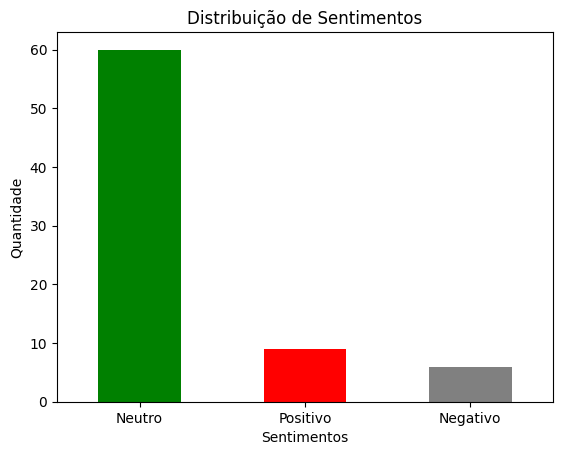

In [65]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Baixar os recursos necessários do NLTK
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')

# Criar o analisador de sentimentos
analyzer = SentimentIntensityAnalyzer()

# Definir palavras-chave que queremos verificar no conteúdo
keywords_incendio = ['incêndio', 'fogo', 'queimado']
keywords_mina = ['mina', 'explosão', 'subterrâneo']
def combine_keywords(incendio_keywords, mina_keywords):
    # Usar um set para garantir que as palavras duplicadas sejam removidas
    combined_keywords = set(incendio_keywords + mina_keywords)
    # Converter de volta para lista e ordenar as palavras
    return sorted(list(combined_keywords))

# Listas de palavras positivas para incêndios e minas
positive_keywords_incendio = [
    "controlado", "rápido", "contido", "salvo", "resolvido", "eficaz", 
    "prevenido", "sucesso", "concluído", "não-danoso", "controlável", 
    "estabilizado", "limitado", "conseguido", "monitorado", "recuperado", 
    "protegido", "isolado", "detido", "barrado", "confinado", "suportado", 
    "manutenção", "planejado", "minimizado", "preservado", "estabilizado", 
    "resgatado", "preservado", "acautelado", "salvamento"
]

positive_keywords_mina = [
    "seguro", "controlado", "estável", "reforçado", "protegido", "monitorado", 
    "consolidado", "viável", "recuperado", "mantido", "descontaminado", "preservado", 
    "expansão", "melhorado", "sustentável", "eficiente", "monitoramento", "segurança", 
    "reabilitado", "detonado com sucesso", "bem-sucedido", "reforço", "aliviado", 
    "desobstruído", "otimizado", "bem-executado", "acompanhado", "tolerante", 
    "aliviamento", "estabilização", "salvo", "desvinculado", "indemne", "preservado", 
    "sustentabilidade", "beneficiado", "protetor", "neutralizado", "otimizado", 
    "protegido", "monitorado com sucesso", "não-impactado", "recuperado com sucesso"
]
def combine_negative_keywords(incendio_keywords, mina_keywords):
    # Usar um set para garantir que as palavras duplicadas sejam removidas
    combined_keywords = set(incendio_keywords + mina_keywords)
    # Converter de volta para lista e ordenar as palavras
    return sorted(list(combined_keywords))

# Listas de palavras negativas para incêndios e minas
negative_keywords_incendio = [
    "descontrolado", "desastre", "devastador", "caos", "grave", "perigoso", 
    "fatal", "mortal", "intenso", "destruição", "irrecuperável", "pânico", 
    "tragédia", "destrutivo", "irracional", "excessivo", "impotente", "incapaz", 
    "irreparável", "devastação", "trágico", "fatalidade", "dano", "incontrolável", 
    "ininterrupto", "devastado", "infrutífero", "comprometido", "dano irreversível"
]

negative_keywords_mina = [
    "perigo", "explosivo", "colapso", "desabamento", "instável", "ruína", 
    "acidente", "desastre", "fatal", "mortal", "explosão", "perigoso", "emergência", 
    "subterrâneo", "grave", "dano", "contaminação", "radiação", "afundamento", 
    "risco", "escavação", "dificuldade", "inseguro", "desabamento", "surto", 
    "descontrolado", "crítico", "insuportável", "irregular", "desestabilizado", 
    "avaria", "esgotamento", "falha"
]

# Usando a função para combinar as palavras negativas
combined_negative_keywords = combine_negative_keywords(negative_keywords_incendio, negative_keywords_mina)

# Exibindo a lista resultante
print(combined_negative_keywords)


# Usando a função para combinar as palavras
combined_positive_keywords = combine_keywords(positive_keywords_incendio, positive_keywords_mina)

# Exibindo a lista resultante
print(combined_positive_keywords)


# Carregar os dados
df_artigos = pd.read_csv('detalhes_artigos_completo.csv')

# Adicionar colunas para o conteúdo e sentimentos
df_artigos['contents'] = None
df_artigos['sentiment_compound'] = None  # Score composto do VADER
df_artigos['sentiment_context'] = None   # Sentimento baseado em palavras-chave

# Iterar sobre os artigos para aplicar análise de sentimentos
for index, row in df_artigos.iterrows():
    url = row['link']
    # Aqui, seria necessário fazer o scraping ou já ter o conteúdo
    cleaned_content = scrape_and_clean_article(url)  # Aqui, você precisa da função de scraping que já tem
    if cleaned_content:
        df_artigos.at[index, 'contents'] = cleaned_content

        # Realizar a análise de sentimentos com o VADER
        sentiment = analyzer.polarity_scores(cleaned_content)
        
        # Adicionar o sentimento composto no dataframe
        df_artigos.at[index, 'sentiment_compound'] = sentiment['compound']
        
        # Verificar palavras-chave e ajustar o sentimento com base nelas
        sentiment_context = 'Neutro'  # Default is neutral
        if any(word in cleaned_content.lower() for word in keywords_positive):
            sentiment_context = 'Positivo'
        elif any(word in cleaned_content.lower() for word in keywords_negative):
            sentiment_context = 'Negativo'

        # Ajustar a classificação final com base no VADER
        if sentiment['compound'] >= 0.05:
            sentiment_context = 'Positivo'
        elif sentiment['compound'] <= -0.05:
            sentiment_context = 'Negativo'

        # Armazenar o contexto final
        df_artigos.at[index, 'sentiment_context'] = sentiment_context

# Contar a quantidade de cada sentimento
sentiment_counts = df_artigos['sentiment_context'].value_counts()

# Plotando o gráfico
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])

plt.title('Distribuição de Sentimentos')
plt.xlabel('Sentimentos')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
plt.show()


# Só VADER Automático

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ap3lo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Erro ao processar https://arquivo.pt/noFrame/replay/20171028002901/http://www.cmjornal.pt/insolitos/detalhe/livro-escolar-mostra-rei-da-arabia-saudita-com-yoda: 429 Client Error: Too Many Requests for url: https://arquivo.pt/noFrame/replay/20171028002901/http://www.cmjornal.pt/insolitos/detalhe/livro-escolar-mostra-rei-da-arabia-saudita-com-yoda
Erro ao processar https://arquivo.pt/noFrame/replay/20170105210902/http://www.cmjornal.pt/multimedia/videos/detalhe/papa-exorta-bispos-a-terem-tolerancia-zero-com-abusos-sexuais?ref=HP_Multimedia&act=0&est=Aberto: 429 Client Error: Too Many Requests for url: https://arquivo.pt/noFrame/replay/20170105210902/http://www.cmjornal.pt/multimedia/videos/detalhe/papa-exorta-bispos-a-terem-tolerancia-zero-com-abusos-sexuais?ref=HP_Multimedia&act=0&est=Aberto
Erro ao processar https://arquivo.pt/noFrame/replay/20170710044923/http://www.cmjornal.pt/portugal/cidades/detalhe/zoomarine-quer-evitar-extincao-da-vaquita?ref=cidades_MaisVistas: 429 Client Error:

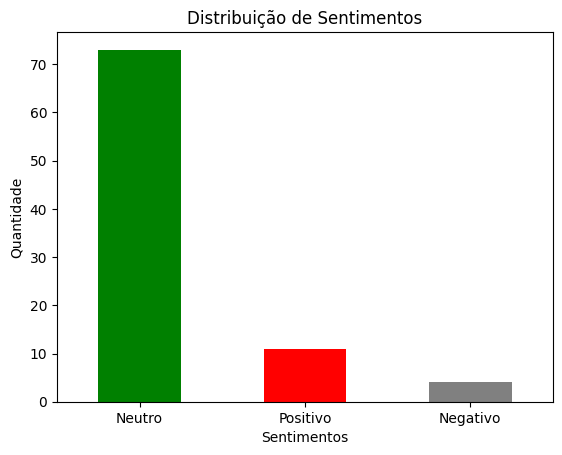

In [66]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Baixar os recursos necessários do NLTK
nltk.download('vader_lexicon')

# Criar o analisador de sentimentos
analyzer = SentimentIntensityAnalyzer()

# Carregar os dados
df_artigos = pd.read_csv('detalhes_artigos_completo.csv')

# Adicionar colunas para o conteúdo e sentimentos
df_artigos['contents'] = None
df_artigos['sentiment_compound'] = None  # Score composto do VADER
df_artigos['sentiment_context'] = None   # Sentimento final com base no VADER

# Iterar sobre os artigos para aplicar análise de sentimentos
for index, row in df_artigos.iterrows():
    url = row['link']
    # Aqui, seria necessário fazer o scraping ou já ter o conteúdo
    cleaned_content = scrape_and_clean_article(url)  # Aqui, você precisa da função de scraping que já tem
    if cleaned_content:
        df_artigos.at[index, 'contents'] = cleaned_content

        # Realizar a análise de sentimentos com o VADER
        sentiment = analyzer.polarity_scores(cleaned_content)
        
        # Adicionar o sentimento composto no dataframe
        df_artigos.at[index, 'sentiment_compound'] = sentiment['compound']
        
        # Classificar o sentimento em 'Positivo', 'Negativo' ou 'Neutro' com base no score composto
        if sentiment['compound'] >= 0.05:
            sentiment_context = 'Positivo'
        elif sentiment['compound'] <= -0.05:
            sentiment_context = 'Negativo'
        else:
            sentiment_context = 'Neutro'
        
        df_artigos.at[index, 'sentiment_context'] = sentiment_context

# Contar a quantidade de cada sentimento
sentiment_counts = df_artigos['sentiment_context'].value_counts()

# Plotando o gráfico
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])

plt.title('Distribuição de Sentimentos')
plt.xlabel('Sentimentos')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
plt.show()


# Vader Manual melhorado

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ap3lo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ap3lo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ap3lo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Palavras Positivas Combinadas:  ['acautelado', 'acompanhado', 'aliviado', 'aliviamento', 'barrado', 'bem-executado', 'bem-sucedido', 'beneficiado', 'concluído', 'confinado', 'conseguido', 'consolidado', 'contido', 'controlado', 'controlável', 'descontaminado', 'desobstruído', 'desvinculado', 'detido', 'detonado com sucesso', 'eficaz', 'eficiente', 'estabilizado', 'estabilização', 'estável', 'expansão', 'indemne', 'isolado', 'limitado', 'mantido', 'manutenção', 'melhorado', 'minimizado', 'monitorado', 'monitorado com sucesso', 'monitoramento', 'neutralizado', 'não-danoso', 'não-impactado', 'otimizado', 'planejado', 'preservado', 'prevenido', 'protegido', 'protetor', 'reabilitado', 'recuperado', 'recuperado com sucesso', 'reforçado', 'reforço', 'resgatado', 'resolvido', 'rápido', 'salvamento', 'salvo', 'segurança', 'seguro', 'sucesso', 'suportado', 'sustentabilidade', 'sustentável', 'tolerante', 'viável']
Palavras Negativas Combinadas:  ['acidente', 'afundamento', 'avaria', 'caos', 'cola

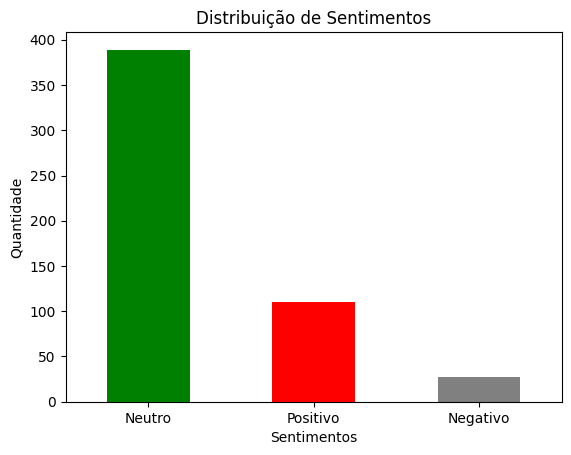

In [67]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Baixar os recursos necessários do NLTK
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')

# Criar o analisador de sentimentos
analyzer = SentimentIntensityAnalyzer()

# Definir palavras-chave para incêndios e minas
keywords_incendio = ['incêndio', 'fogo', 'queimado']
keywords_mina = ['mina', 'explosão', 'subterrâneo']

# Função para combinar palavras-chave de forma única
def combine_keywords(incendio_keywords, mina_keywords):
    # Usar um set para garantir que as palavras duplicadas sejam removidas
    combined_keywords = set(incendio_keywords + mina_keywords)
    # Converter de volta para lista e ordenar as palavras
    return sorted(list(combined_keywords))

# Listas de palavras positivas para incêndios e minas
positive_keywords_incendio = [
    "controlado", "rápido", "contido", "salvo", "resolvido", "eficaz", 
    "prevenido", "sucesso", "concluído", "não-danoso", "controlável", 
    "estabilizado", "limitado", "conseguido", "monitorado", "recuperado", 
    "protegido", "isolado", "detido", "barrado", "confinado", "suportado", 
    "manutenção", "planejado", "minimizado", "preservado", "estabilizado", 
    "resgatado", "preservado", "acautelado", "salvamento"
]

positive_keywords_mina = [
    "seguro", "controlado", "estável", "reforçado", "protegido", "monitorado", 
    "consolidado", "viável", "recuperado", "mantido", "descontaminado", "preservado", 
    "expansão", "melhorado", "sustentável", "eficiente", "monitoramento", "segurança", 
    "reabilitado", "detonado com sucesso", "bem-sucedido", "reforço", "aliviado", 
    "desobstruído", "otimizado", "bem-executado", "acompanhado", "tolerante", 
    "aliviamento", "estabilização", "salvo", "desvinculado", "indemne", "preservado", 
    "sustentabilidade", "beneficiado", "protetor", "neutralizado", "otimizado", 
    "protegido", "monitorado com sucesso", "não-impactado", "recuperado com sucesso"
]

# Combinar as palavras positivas
combined_positive_keywords = combine_keywords(positive_keywords_incendio, positive_keywords_mina)

# Listas de palavras negativas para incêndios e minas
negative_keywords_incendio = [
    "descontrolado", "desastre", "devastador", "caos", "grave", "perigoso", 
    "fatal", "mortal", "intenso", "destruição", "irrecuperável", "pânico", 
    "tragédia", "destrutivo", "irracional", "excessivo", "impotente", "incapaz", 
    "irreparável", "devastação", "trágico", "fatalidade", "dano", "incontrolável", 
    "ininterrupto", "devastado", "infrutífero", "comprometido", "dano irreversível"
]

negative_keywords_mina = [
    "perigo", "explosivo", "colapso", "desabamento", "instável", "ruína", 
    "acidente", "desastre", "fatal", "mortal", "explosão", "perigoso", "emergência", 
    "subterrâneo", "grave", "dano", "contaminação", "radiação", "afundamento", 
    "risco", "escavação", "dificuldade", "inseguro", "desabamento", "surto", 
    "descontrolado", "crítico", "insuportável", "irregular", "desestabilizado", 
    "avaria", "esgotamento", "falha"
]

# Combinar as palavras negativas
combined_negative_keywords = combine_keywords(negative_keywords_incendio, negative_keywords_mina)

# Exibindo as listas resultantes
print("Palavras Positivas Combinadas: ", combined_positive_keywords)
print("Palavras Negativas Combinadas: ", combined_negative_keywords)

# Carregar os dados (substitua com o caminho correto para o arquivo)
df_artigos = pd.read_csv('detalhes_artigos_completo.csv')

# Adicionar colunas para o conteúdo e sentimentos
df_artigos['contents'] = None
df_artigos['sentiment_compound'] = None  # Score composto do VADER
df_artigos['sentiment_context'] = None   # Sentimento baseado em palavras-chave

# Iterar sobre os artigos para aplicar análise de sentimentos
for index, row in df_artigos.iterrows():
    url = row['link']
    # Aqui, seria necessário fazer o scraping ou já ter o conteúdo
    cleaned_content = scrape_and_clean_article(url)  # Aqui, você precisa da função de scraping que já tem
    if cleaned_content:
        df_artigos.at[index, 'contents'] = cleaned_content

        # Realizar a análise de sentimentos com o VADER
        sentiment = analyzer.polarity_scores(cleaned_content)
        
        # Adicionar o sentimento composto no dataframe
        df_artigos.at[index, 'sentiment_compound'] = sentiment['compound']
        
        # Verificar palavras-chave e ajustar o sentimento com base nelas
        sentiment_context = 'Neutro'  # Default is neutral
        if any(word in cleaned_content.lower() for word in combined_positive_keywords):
            sentiment_context = 'Positivo'
        elif any(word in cleaned_content.lower() for word in combined_negative_keywords):
            sentiment_context = 'Negativo'

        # Ajustar a classificação final com base no VADER
        if sentiment['compound'] >= 0.05:
            sentiment_context = 'Positivo'
        elif sentiment['compound'] <= -0.05:
            sentiment_context = 'Negativo'

        # Armazenar o contexto final
        df_artigos.at[index, 'sentiment_context'] = sentiment_context

# Contar a quantidade de cada sentimento
sentiment_counts = df_artigos['sentiment_context'].value_counts()

# Plotando o gráfico
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])

plt.title('Distribuição de Sentimentos')
plt.xlabel('Sentimentos')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
plt.show()
